<a href="https://colab.research.google.com/github/OjoJosh7/Machine-Learning/blob/main/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mini-Project Title: Building a Text Classification Model for News Categorization

## Overview
This project focuses on using Natural Language Processing (NLP) techniques to build a text classification model for news categorization. With a large influx of news articles daily, manual categorization is inefficient. Automating this process using NLP ensures scalability, accuracy, and consistency.


## Objective
Develop an NLP-powered machine learning model that categorizes news articles into predefined categories such as Politics, Sports, Technology, Entertainment, and Health. This project covers the complete NLP pipeline, including preprocessing, feature extraction, model training, evaluation, and deployment.

## Learning Outcomes
1. Understand text preprocessing techniques like tokenization, stopword removal, and stemming/lemmatization.
2. Explore feature extraction methods such as Bag of Words, TF-IDF, and word embeddings.
3. Learn to use NLP libraries like NLTK, spaCy, and Hugging Face Transformers.
4. Experiment with NLP-specific models such as LSTM, BERT, or other transformer-based models.
5. Gain experience in deploying NLP models via APIs.


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Automation of news categorization using NLP can save time, improve accuracy, and enhance user experience by organizing content effectively.

### Mini-task:
Write a brief paragraph on how NLP benefits the media industry in automating news categorization.


## Step 2: Data Collection
### Task:
Collect a dataset of news articles suitable for text classification. Publicly available datasets such as the AG News dataset or datasets from Kaggle can be used.

### Mini-task:
Download and load a suitable dataset for NLP tasks.


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the text structure, class distribution, and any potential imbalances.

### Mini-task:
Visualize the class distribution using a bar chart and inspect a few examples of text data.

Example

```python
import pandas as pd
import matplotlib.pyplot as plt

# Convert dataset to DataFrame for easier manipulation
df = pd.DataFrame(dataset['train'])
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

# Inspect a sample
print(df.head())
```

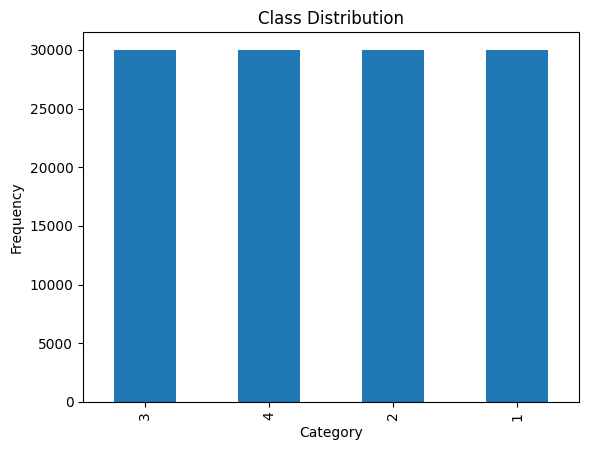

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert dataset to DataFrame for easier manipulation
df = pd.read_csv('sample_data/train.csv')
df.head()

df['Class Index'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

## Step 4: Text Preprocessing
### Task:
Preprocess the text data using techniques such as:
- Lowercasing
- Tokenization
- Stopword removal
- Lemmatization (optional)

### Mini-task:
Clean a small sample of the dataset using NLP libraries like NLTK or spaCy.

Example

```python
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess)
print(df[['text', 'cleaned_text']].head())
```


In [8]:
df['text'] = df['Title'] + ' ' + df['Description']
df.head()

,Class Index,Title,Description,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [9]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# A function to preprocess text
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess)
df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,Wall St. Bears Claw Back Into the Black (Reute...,wall st bears claw black reuter reuter short s...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,carlyle look commercial aerospace reuter reute...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,oil economy cloud stock outlook reuters reuter...
3,Iraq Halts Oil Exports from Main Southern Pipe...,iraq halt oil export main southern pipeline re...
4,"Oil prices soar to all-time record, posing new...",oil price soar time record pose new menace eco...


### Step 5: Feature Engineering
### Task:
Convert the preprocessed text into numerical representations using:
- Bag of Words (BoW)
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Pre-trained word embeddings (e.g., GloVe or FastText)

### Mini-task:
Compare the feature matrices generated using TF-IDF and embeddings.

Example

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Representation
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
```

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Representation
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (120000, 5000)


## Step 6: Model Training Using NLP Models
### Task:
Train a machine learning model using features derived from NLP techniques. You can use classical models like Logistic Regression or advanced models like LSTMs or transformers.

### Mini-task:
Train a simple logistic regression model on the TF-IDF features.

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
```


### Optional: Fine-Tune a BERT Model
Train a transformer-based model using the Hugging Face `transformers` library for state-of-the-art results in text classification.